<a href="https://colab.research.google.com/github/Alvaro-C7/predicciones-de-ventas/blob/main/proyecci%C3%B3n_ventas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import pandas as pd
filename = '/content/sales_predictions_2023 (1).csv'
df = pd.read_csv(filename)

Número de filas(observaciones) y columnas

In [37]:
df.shape
Filas=df.shape[0]
Columnas=df.shape[1]
print (f"Hay {Filas} filas y {Columnas} columnas.")

Hay 8523 filas y 12 columnas.


Tipos de datos de cada variable

In [38]:
print(df.dtypes)

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


**LIMPIEZA DE DATOS**

 a. ¿Hay columnas duplicadas?

In [39]:
dup = df.duplicated().sum()
print(f"Hay {dup} columnas duplicadas.")

Hay 0 columnas duplicadas.


b. Identificación de valores faltantes

In [40]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

c. Eliminación de valores faltantes

c.1. ¿Eliminar filas?

No sería razonable eliminar las filas con valores faltantes puesto que representaría una pérdida considerable de datos. Tanto en la columna de Item_Weight, cuyas filas con valores faltantes son el siguiente porcentaje del total:

In [41]:
((int(df['Item_Weight'].isna().sum()) / int(df.shape[0])) *100)

17.165317376510618

Así como en el columna Outlet_Size, con un porcentaje aún mayor:

In [42]:
((int(df['Outlet_Size'].isna().sum()) / int(df.shape[0])) *100)

28.27642848762173

Por ello, la estrategía de eliminar las filas con valores faltantes queda descartada ante la posible pérdida considerable de datos significativos para nuestra predicción de ventas.

c.2. ¿Eliminar Columnas?

Las columnas Item_Weight y Outlet_Size representa tanto el peso del producto, como el tamaño de la tienda en relación al área total. Debido a que, no hay una clara certeza de si los datos de ambas columnas son significativas para realizar nuestra predicción, se optará por seguir la estrategia del 50%, que implica que si la cantidad de valores faltantes en un columna supera el 50% de su total de elementos respectivos, se procede a eliminar dicha columna.

Por ello, y tomando en consideración los cálculos anteriores en donde el porcentaje de valores faltantes en la columnas Item_Weight y Outlet_Size es de 17% y 28%, respectivamente; no se eliminarán las columnas.

c.3. ¿Rellenar los valores faltantes?

Se decidirá por rellenar los valores faltantes, ya que tanto la estretegia como eliminar filas o columnas fueron descartadas, y, además, se evitará perder una cantidad significativa  de datos.

c.3.1. Columna 'Item_Weight'

Esta columna representa el peso del producto y es un número decimal (o *float*). Se procederá a imputar bajo la estrategia de rellenar los valores faltantes con la media de los datos actuales. Emplearemos la media, ya que representa el valor promedio de todos los pesos de los productos actuales.

In [43]:
media= df['Item_Weight'].mean()
df['Item_Weight'].fillna(media,inplace= True)
df.isna().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

c.3.2. Columna 'Outlet_Size'

Esta columna representa el tamaño de la tienda en relación al área total. Veamos si está correlacionada con la columna 'Outlet_Type', que expresa si el punto de venta es una tienda de comestibles o algún tipo de supermercado.

In [44]:
df.groupby('Outlet_Type')['Outlet_Size'].value_counts()


Outlet_Type        Outlet_Size
Grocery Store      Small           528
Supermarket Type1  Small          1860
                   High            932
                   Medium          930
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
Name: Outlet_Size, dtype: int64

Se evidencia que existe correlación entre ambas columnas, debido a que los puntos de venta muestran una relación marcada con el tamaño de la tienda en relación al área. Por ello, se concluye lo siguiente:

- Los 'Grocery Store' presentan una única concentración en un tamaño 'Small' de la tienda.

- Los supermercados tipo 1, aunque disponen de los 3 tipos de tamaño de tienda, tienen una marcada concentración en las tiendas de tamaño 'Small'

- Tanto los supermercados tipo 2 y 3 muestran un único tamaño de tienda que es el 'Medium'.


Debido a que faltan valores en la columna de 'Outlet_Size', se tomará en cuenta este análisis de correlación con la columna 'Outlet_Type' y se imputarán los tipos de tamaños de tienda más frecuentes por cada punto de venta.

Para ello, primero se evaluará cuáles son los puntos de venta que presentan valores faltantes de 'Outlet_Size'

In [45]:
filter_na = df['Outlet_Size'].isna()
df2 = df[filter_na]
df2.groupby('Outlet_Type')['Outlet_Size'].sum()

Outlet_Type
Grocery Store        0
Supermarket Type1    0
Name: Outlet_Size, dtype: object

Se aprecia que solo el supermercado de tipo 1 y el Grocery Store presentan valores faltantes de 'Outlet_Size'. Se procederá a rellenar estos valores como ya se había mencionado (con el tamaño que más se repite en cada punto de venta: en ambos 'Small').

In [46]:
df['Outlet_Size'].fillna('Small',inplace= True)
df.groupby('Outlet_Type')['Outlet_Size'].value_counts()

Outlet_Type        Outlet_Size
Grocery Store      Small          1083
Supermarket Type1  Small          3715
                   High            932
                   Medium          930
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
Name: Outlet_Size, dtype: int64

Método extra:
Si los valores faltantes también hubieran estado asociados a los otros puntos de venta (supermercados de tipo 2 o 3), habría un problema pues tendría que rellenarse no solamente con 'Small', sino también con 'Medium'. En ese caso, el siguiente código resolvería dicho dilema.

In [47]:
# df['Outlet_Size'] = df['Outlet_Size'].fillna(df.groupby('Outlet_Type')['Outlet_Size'].transform(lambda x: x.mode().iloc[0]))
# print(df.groupby('Outlet_Type')['Outlet_Size'].value_counts())
# print(df.isna().sum())

d. Comprobación de DataFrame sin valores faltantes

In [48]:
print(df.isna().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


e. Garantizar la consistencia en los datos

Primero analizaremos si el tipo de dato en cada columna es consistente con lo que representa.

In [49]:
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Se observa que todas las columnas categóricas del dataframe son 'object', por lo que significa que son 'strings', lo cual hace sentido. En el caso de las columnas númericas, aquellas con decimales son 'float64' y la única columna con números enteros muestra un *dtype* de 'int', por lo que se cumple en ambos casos la consistencia entre el tipo de dato y lo que representa la columna.

Ahora analizaremos si existen errores tipográficos en las columnas categóricas y corregir si es necesario.

In [50]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [51]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['LF','reg','low fat'],'Low Fat')
df['Item_Fat_Content'].value_counts()

Low Fat    5634
Regular    2889
Name: Item_Fat_Content, dtype: int64

In [52]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [53]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

f. Métodos de agregación de las columnas númericas

In [54]:
df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.86,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


f.1. Incluir columnas categóricas

In [55]:
df.describe(include='all').round(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,8523.00,8523,8523.00,8523,8523.00,8523,8523.00,8523,8523,8523,8523.00
unique,1559,NaN,2,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Small,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5634,NaN,1232,NaN,935,NaN,4798,3350,5577,NaN
mean,NaN,12.86,NaN,0.07,NaN,140.99,NaN,1997.83,NaN,NaN,NaN,2181.29
std,NaN,4.23,NaN,0.05,NaN,62.28,NaN,8.37,NaN,NaN,NaN,1706.50
min,NaN,4.56,NaN,0.00,NaN,31.29,NaN,1985.00,NaN,NaN,NaN,33.29
25%,NaN,9.31,NaN,0.03,NaN,93.83,NaN,1987.00,NaN,NaN,NaN,834.25
50%,NaN,12.86,NaN,0.05,NaN,143.01,NaN,1999.00,NaN,NaN,NaN,1794.33
75%,NaN,16.00,NaN,0.09,NaN,185.64,NaN,2004.00,NaN,NaN,NaN,3101.30


**ANÁLISIS ESTADÍSTICO**


a. Histogramas:

Los histogramas es un tipo de distribución de frecuencia que nos permite analizar la concentración en un conjunto de datos númericos. Aquello lo realiza dividiendo el conjunto en intervalos y realizando un recuento de los valores pertenecientes a cada rango.

A continuación, se realizarán histogramas de cada columna numérica.

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Text(0, 0.5, 'Recuento de productos')

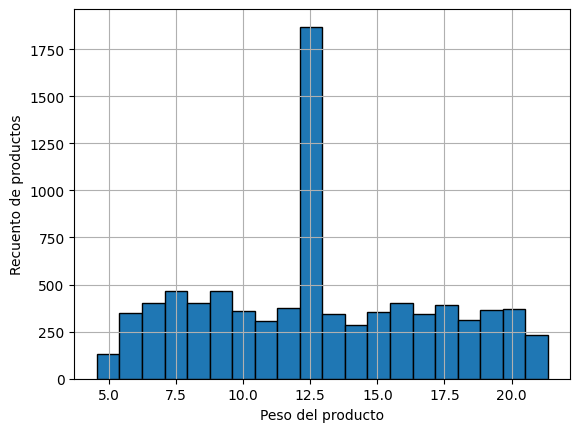

In [57]:
df['Item_Weight'].hist(bins = 20, edgecolor = 'black')
plt.xlabel('Peso del producto')
plt.ylabel('Recuento de productos')

Text(0, 0.5, 'Recuento de productos')

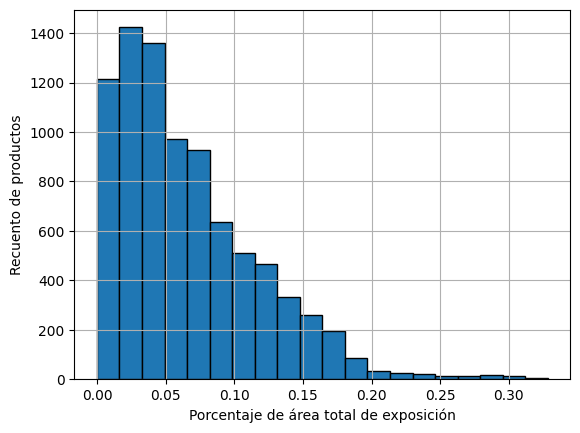

In [58]:
df['Item_Visibility'].hist(bins=20, edgecolor = 'black')
plt.xlabel('Porcentaje de área total de exposición')
plt.ylabel('Recuento de productos')


Text(0, 0.5, 'Recuento de productos')

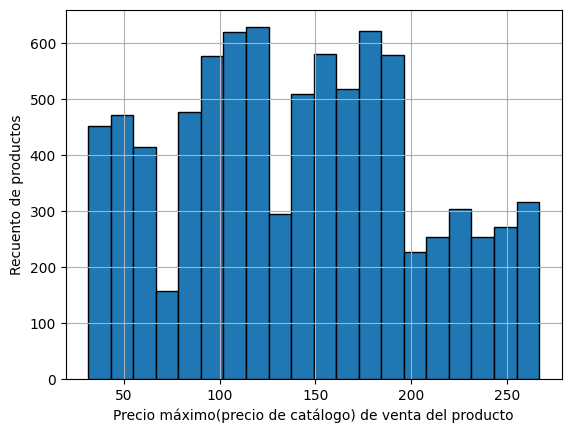

In [59]:
df['Item_MRP'].hist(bins=20, edgecolor= 'black')
plt.xlabel('Precio máximo(precio de catálogo) de venta del producto')
plt.ylabel('Recuento de productos')

Text(0, 0.5, 'Recuento de productos exhibidos')

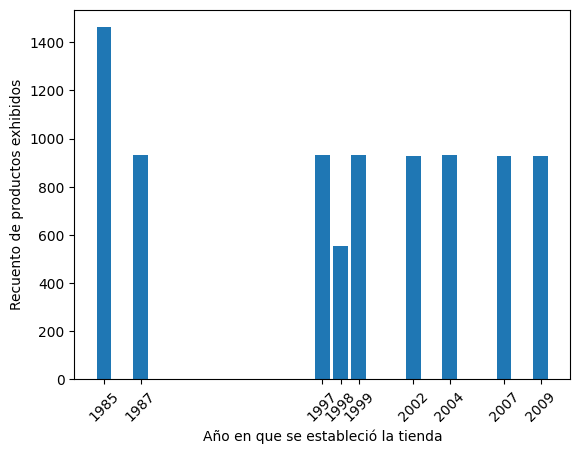

In [60]:
df_Establishment = dict(df['Outlet_Establishment_Year'].value_counts())
plt.bar(list(df_Establishment.keys()),list(df_Establishment.values()))
plt.xticks(list(df_Establishment.keys()));
plt.xticks(rotation=45);
plt.xlabel('Año en que se estableció la tienda')
plt.ylabel('Recuento de productos exhibidos')

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


Text(0, 0.5, 'Concentración de ventas')

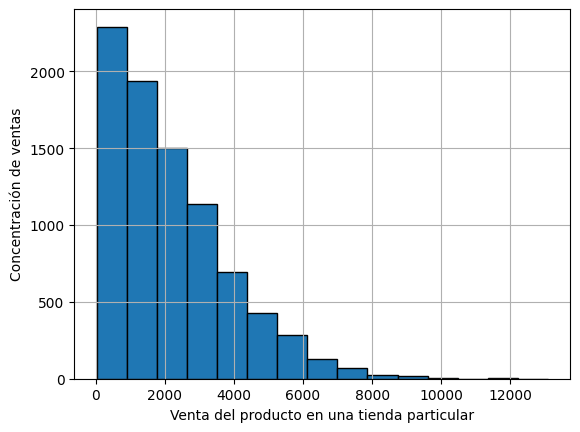

In [61]:
print(df.dtypes)
df['Item_Outlet_Sales'].hist(bins=15, edgecolor = 'black')
plt.xlabel('Venta del producto en una tienda particular')
plt.ylabel('Concentración de ventas')

<ipython-input-62-591f94d9b032>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

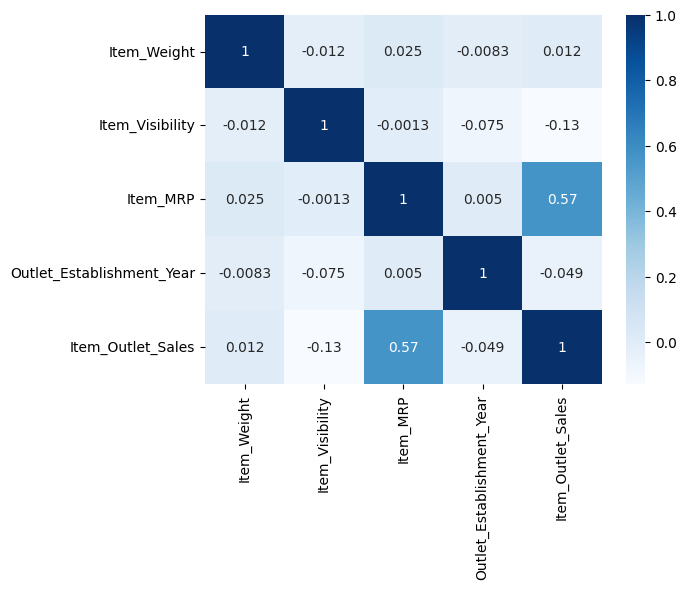

In [62]:
corr = df.corr()
sns.heatmap(corr,cmap='Blues',annot=True)

Text(0.5, 1.0, 'Ventas totales en millones por tienda')

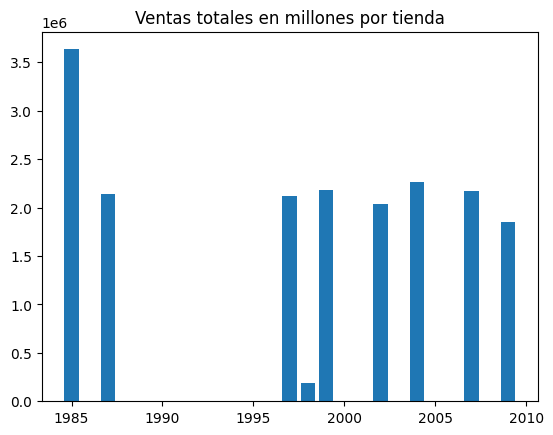

In [114]:
sales_estab = df.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].sum()
plt.bar(list(sales_estab.keys()),list(sales_estab.values))
plt.title('Ventas totales en millones por tienda')

In [76]:
df.head

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


Text(0.5, 1.0, 'Ventas totales en millones por contenido de grasa')

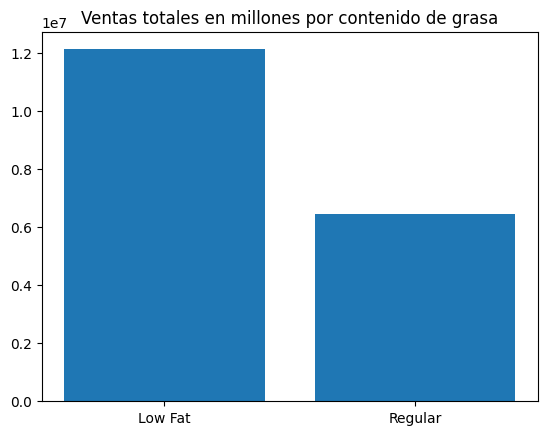

In [102]:
sales_byfat = df.groupby('Item_Fat_Content')['Item_Outlet_Sales'].sum()
plt.bar(list(sales_byfat.keys()),list(sales_byfat.values))
plt.title('Ventas totales en millones por contenido de grasa')

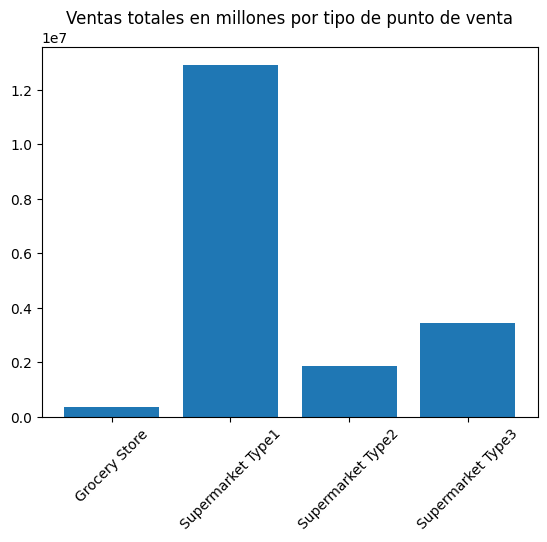

In [106]:
sales_byfat = df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum()
plt.bar(list(sales_byfat.keys()),list(sales_byfat.values))
plt.title('Ventas totales en millones por tipo de punto de venta');
plt.xticks(rotation= 45);

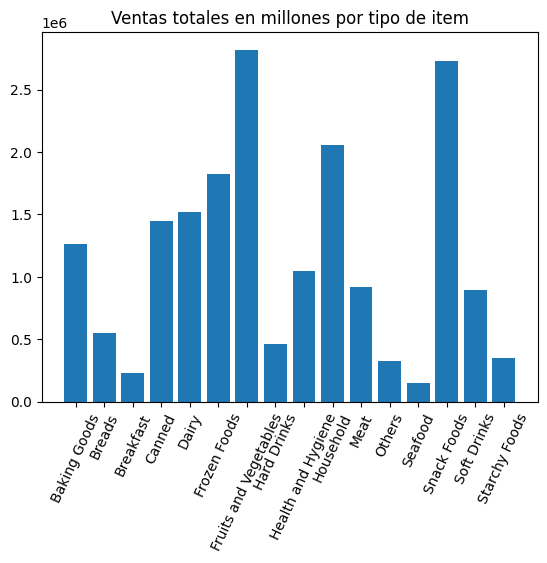

In [111]:
sales_byfat = df.groupby('Item_Type')['Item_Outlet_Sales'].sum()
plt.bar(list(sales_byfat.keys()),list(sales_byfat.values))
plt.title('Ventas totales en millones por tipo de item');
plt.xticks(rotation= 65);

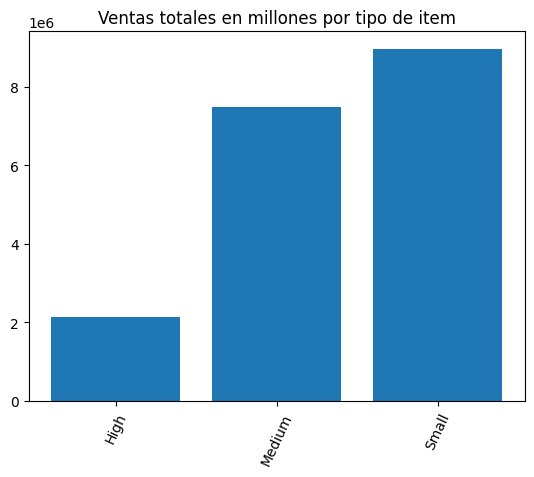

In [112]:
sales_byfat = df.groupby('Outlet_Size')['Item_Outlet_Sales'].sum()
plt.bar(list(sales_byfat.keys()),list(sales_byfat.values))
plt.title('Ventas totales en millones por tipo de item');
plt.xticks(rotation= 65);

(array([1, 2, 3, 4]),
 [Text(1, 0, 'Grocery Store'),
  Text(2, 0, 'Supermarket Type1'),
  Text(3, 0, 'Supermarket Type2'),
  Text(4, 0, 'Supermarket Type3')])

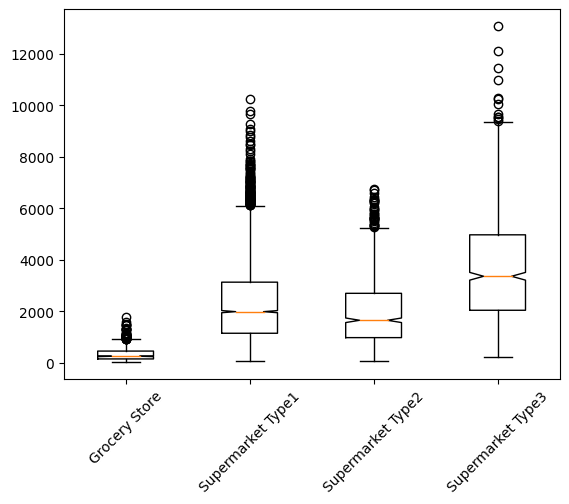

In [133]:
gr = df.loc[df['Outlet_Type']=='Grocery Store','Item_Outlet_Sales']
s1 = df.loc[df['Outlet_Type']=='Supermarket Type1','Item_Outlet_Sales']
s2 = df.loc[df['Outlet_Type'] == 'Supermarket Type2', 'Item_Outlet_Sales']
s3 = df.loc[df['Outlet_Type'] == 'Supermarket Type3', 'Item_Outlet_Sales']
fig, axes = plt.subplots(nrows = 1, ncols = 1)
axes.boxplot([gr,s1,s2,s3], notch = True, labels=['Grocery Store', 'Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3']);
plt.xticks(rotation = 45)

In [129]:
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [141]:
filterrr = df['Item_Weight'] <=13
filterrrr = df['Item_Weight'] >=12
lol = df.loc[filterrr & filterrrr,:]
lol.bar()

Low Fat    1324
Regular     651
Name: Item_Fat_Content, dtype: int64